# Cough detection algorithm on OSF dataset

Note that the poor results of the cough detection algorithm meant that we did not use this dataset in the final report.

## Imports

In [ ]:
import os
import sys
# import pickle
sys.path.append(os.path.abspath('../src'))

from feature_class import features
from DSP import classify_cough
from segmentation import segment_cough, compute_SNR

from scipy.io import wavfile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from pathlib import Path

## Paths

In [4]:
data_folder_train = '../osf_dataset/train/'
data_folder_valid = '../osf_dataset/validation/'
data_folder_test = '../osf_dataset/test/'
loaded_model = pickle.load(open(os.path.join('../models', 'cough_classifier'), 'rb'))
loaded_scaler = pickle.load(open(os.path.join('../models','cough_classification_scaler'), 'rb'))

## Data Loading

In [42]:
train_sick_names = [f[0:-4] for f in os.listdir(data_folder_train + 'sick/' )]
train_not_sick_names = [f[0:-4] for f in os.listdir(data_folder_train + 'not_sick/' )]
valid_sick_names = [f[0:-4] for f in os.listdir(data_folder_valid + 'sick/' )]
valid_not_sick_names = [f[0:-4] for f in os.listdir(data_folder_valid + 'not_sick/' )]
test_sick_names = [f[0:-4] for f in os.listdir(data_folder_test + 'sick/' )]
test_not_sick_names = [f[0:-4] for f in os.listdir(data_folder_test + 'not_sick/' )]

train_sick_data = []
train_not_sick_data = []
valid_sick_data = []
valid_not_sick_data = []
test_sick_data = []
test_not_sick_data = []

train_sick_cough = []
train_not_sick_cough = []
valid_sick_cough = []
valid_not_sick_cough = []
test_sick_cough = []
test_not_sick_cough = []

train_sick_label = []
train_not_sick_label = []
valid_sick_label = []
valid_not_sick_label = []
test_sick_label = []
test_not_sick_label = []

## Cough Detection Algorithm

In [50]:
for counter, name in enumerate(test_sick_names):
    
    if (counter%100 == 0):
        print("Finished {0}/{1}".format(counter,len(test_sick_names)))
    
    fs, x = wavfile.read(data_folder_test + 'sick/' + name + '.wav')
    test_sick_cough.append(classify_cough(x, fs, loaded_model, loaded_scaler))
    test_sick_data.append(x)
    test_sick_label.append("sick")

Finished 0/641
Finished 100/641
Finished 200/641
Finished 300/641
Finished 400/641
Finished 500/641
Finished 600/641


In [58]:
# Saved metadata in csv file

df = pd.DataFrame()
df["ID"] = train_sick_names + train_not_sick_names + valid_sick_names + valid_not_sick_names + test_sick_names + test_not_sick_names
df["cough_detected"] = train_sick_cough + train_not_sick_cough + valid_sick_cough + valid_not_sick_cough + test_sick_cough + test_not_sick_cough
df["label"] = train_sick_label + train_not_sick_label + valid_sick_label + valid_not_sick_label + test_sick_label + test_not_sick_label
df.set_index("ID")
df

df.to_csv('osf_metadata_summary.csv', index = False)

(array([3608., 1048.,  505.,  311.,  241.,  165.,  157.,  151.,  178.,
         223.]),
 array([0.        , 0.09971122, 0.19942243, 0.29913365, 0.39884486,
        0.49855608, 0.59826729, 0.69797851, 0.79768972, 0.89740094,
        0.99711215]),
 <BarContainer object of 10 artists>)

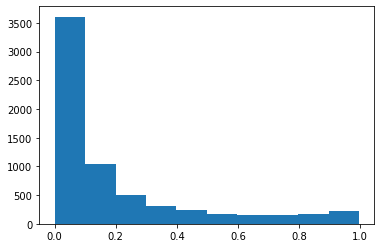

In [57]:
plt.hist(df["cough_detected"])